## We will compare the performance of a GP trained using two methods. 
> Min Max Latin HyperCube Sampling

> Active learning sampling (Emukit)

### Generate 50 initial design points using LHS which will be used as common initial data for both methods

In [2]:
from emukit.core.initial_designs.latin_design import LatinDesign
from emukit.core import ParameterSpace, ContinuousParameter

import run_simple_energy_loss_parallel_pool

import pandas as pd
import numpy as np

import os

In [3]:
simulation = run_simple_energy_loss_parallel_pool.run_simulation

In [4]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [5] # p_T Observables we will use for the analysis

In [5]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.1,0.4 ),
                                  ContinuousParameter('exponent_inel', -2, 2),
                                  ContinuousParameter('exponent_el', -2, 2),
                                  ContinuousParameter('scale_inel', 0.1, 0.4),
                                  ContinuousParameter('scale_el', 0.1, 0.4)])

In [6]:
param_keys = ['alpha_s','exponent_inel','exponent_el','scale_inel', 'scale_el']
result_keys = ['pT {} GeV'.format(str(i)) for i in np.linspace(*pT_range)]
clms_names = np.hstack((param_keys,result_keys))
print(clms_names)

['alpha_s' 'exponent_inel' 'exponent_el' 'scale_inel' 'scale_el'
 'pT 1.0 GeV' 'pT 2.0 GeV' 'pT 3.0 GeV' 'pT 4.0 GeV' 'pT 5.0 GeV'
 'pT 6.0 GeV' 'pT 7.0 GeV' 'pT 8.0 GeV' 'pT 9.0 GeV' 'pT 10.0 GeV']


In [7]:
n_start = 50
if os.path.exists('lhs_step_200.csv'):
    lhs_df = pd.read_csv('lhs_step_200.csv')
    
else:
    for n in range(start_n,205,5):
        design = LatinDesign(parameter_space) 
    # Keep the first 50 as initial training point for active learning. 
    # Use all 100 to train a GP
        num_data_points = n 
        X = design.get_samples(num_data_points)
        Y_all = simulation(X,*pT_range)
        step = n* np.ones(shape=(num_data_points,1))
        X = np.hstack((step, X))
        if n == n_start:
            X_b = X
            Y_b = Y_all
        else:
            X_b = np.vstack((X_b, X))
            Y_b = np.vstack((Y_b, Y_all))
    lhs_data=np.hstack((X_b,Y_b))
    print(lhs_data.shape)
    print('saving the lhs to a csv file')
    lhs_df = pd.DataFrame(lhs_data,columns=clms_names)
    # Write dataframe to file
    lhs_df.to_csv('lhs_step_200.csv', index = False)

In [8]:
lhs_df[lhs_df['step'] == 200 ]

,step,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
3675,200.0,0.20725,-0.19,0.91,0.30175,0.38125,0.888160,0.944681,0.516625,0.403558,0.354879,0.329712,0.315391,0.306236,0.297834,0.286712
3676,200.0,0.22825,0.57,1.53,0.28375,0.24925,0.845937,0.900983,0.486318,0.377998,0.331713,0.307984,0.294619,0.286146,0.278277,0.267623
3677,200.0,0.25375,-0.97,-1.25,0.24025,0.34075,0.644395,0.710094,0.259191,0.170614,0.137075,0.121081,0.112501,0.107143,0.102055,0.095145
3678,200.0,0.28525,-0.51,0.55,0.31375,0.28975,0.761764,0.859219,0.239059,0.136106,0.098626,0.080771,0.071007,0.064794,0.059148,0.052073
3679,200.0,0.39025,0.49,1.11,0.24475,0.30925,0.627475,0.745469,0.109837,0.047069,0.029048,0.021598,0.017835,0.015475,0.013396,0.011105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,200.0,0.28075,-0.61,-1.63,0.14275,0.28225,0.588295,0.646960,0.240975,0.159913,0.129144,0.114551,0.106815,0.102034,0.097393,0.090866
3871,200.0,0.15475,0.15,-1.55,0.11275,0.27925,0.859453,0.890517,0.639192,0.558905,0.521853,0.502307,0.491346,0.484606,0.478122,0.468328
3872,200.0,0.19525,1.81,-1.93,0.35125,0.15625,0.867858,0.899597,0.643384,0.561625,0.523855,0.503872,0.492609,0.485643,0.478981,0.469057
3873,200.0,0.23425,-1.95,-0.19,0.33625,0.27625,0.837701,0.977322,0.181089,0.085244,0.054603,0.041023,0.033867,0.029328,0.025352,0.020957


In [9]:
start_n = 50
#X_all = np.array(lhs_df.iloc[:,:5])
#Y_all = np.array(lhs_df.iloc[:,5:])
# Start with the 50 sample LHS design
X_init = np.array(lhs_df[lhs_df['step'] == start_n ])[:,1:6]
Y_init = np.array(lhs_df[lhs_df['step'] == start_n ])[:,6:]

print(f'Shape of initial design {X_init.shape} and initial observables {Y_init.shape}')

Shape of initial design (50, 5) and initial observables (50, 10)


In [10]:
# Load validation data
validation_df = pd.read_csv('validation.csv', index_col=0)
X_valid = np.array(validation_df.iloc[:,:5])
Y_valid = np.array(validation_df.iloc[:,5:])
print(f'Shape of validation design {X_valid.shape} and validation observables {Y_valid.shape}')
validation_df.head()

Shape of validation design (100, 5) and validation observables (100, 10)


,alpha_s,exponent_inel,exponent_el,scale_inel,scale_el,pT 1.0 GeV,pT 2.0 GeV,pT 3.0 GeV,pT 4.0 GeV,pT 5.0 GeV,pT 6.0 GeV,pT 7.0 GeV,pT 8.0 GeV,pT 9.0 GeV,pT 10.0 GeV
0,0.139880,1.233532,0.023331,0.277208,0.310282,0.923065,0.944544,0.765945,0.703582,0.673583,0.657323,0.648015,0.642235,0.636743,0.628520
1,0.332736,-0.131905,0.751403,0.212024,0.279861,0.688620,0.791497,0.175990,0.092273,0.064660,0.052266,0.045716,0.041578,0.037848,0.033352
2,0.370226,1.457209,-0.285213,0.201070,0.190545,0.568233,0.665193,0.114913,0.051152,0.031581,0.023231,0.018968,0.016290,0.013855,0.011014
3,0.259227,-0.766722,-1.405136,0.164316,0.136741,0.803727,0.875761,0.366005,0.254727,0.210319,0.188285,0.176045,0.168278,0.161129,0.151751
4,0.276825,-0.279757,-0.899501,0.178222,0.316869,0.651347,0.718871,0.258172,0.168719,0.135002,0.118950,0.110332,0.104940,0.099839,0.092970


## Need to write a function that runs iteratively adding more design points and train both type of gps. 
> plots should have how rms error decreases for the two types with time

> How predictions at the truth compare at each steps of sampling


In [11]:
prior_ranges= {'alpha_s':(0.1,0.4), 'exponent_inel':(-2,2), 'exponent_el':(-2,2), 'scale_inel':(0.1, 0.4), 'scale_el':(0.1, 0.4)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

In [12]:
# define the two types of gp we will use
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

In [13]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

#gp_array = []

rbf_kern_1 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_1 = rbf_kern_1
model_gpy_1 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_1, noise_var=0.01**2)
model_gpy_1.optimize_restarts(num_restarts = 30)
model_emukit_1 = GPyModelWrapper(model_gpy_1, n_restarts=30)
    
rbf_kern_2 =  RBF(input_dim=5, variance= 1, lengthscale=ptp, ARD=True)
my_kernel_2 = rbf_kern_2
model_gpy_2 = GPRegression(X=X_init, Y=Y_init[:, pT_obs], kernel=my_kernel_2, noise_var=0.01**2)
model_gpy_2.optimize_restarts(num_restarts = 30)
model_emukit_2 = GPyModelWrapper(model_gpy_2, n_restarts=30)
    
gp_array = [model_emukit_1, model_emukit_2]

Optimization restart 1/30, f = -100.45696024472886
Optimization restart 2/30, f = -100.45696031982365
Optimization restart 3/30, f = -100.4569598385545
Optimization restart 4/30, f = -100.45696036278902
Optimization restart 5/30, f = -100.45696034910922
Optimization restart 6/30, f = -100.45696026160826
Optimization restart 7/30, f = -100.4569603015402
Optimization restart 8/30, f = -100.45696035328511
Optimization restart 9/30, f = -100.45696034429871
Optimization restart 10/30, f = -100.4569603617549
Optimization restart 11/30, f = -100.45696027337239
Optimization restart 12/30, f = -100.4569597785225
Optimization restart 13/30, f = -100.45696025341827
Optimization restart 14/30, f = -100.45696024334838
Optimization restart 15/30, f = -100.45696022437056
Optimization restart 16/30, f = -100.45696033804224
Optimization restart 17/30, f = -93.07138313200919
Optimization restart 18/30, f = -100.45696036090422
Optimization restart 19/30, f = -100.45696034182973
Optimization restart 20/30

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 25/30, f = -100.4569602266235
Optimization restart 26/30, f = -100.45696035195725
Optimization restart 27/30, f = -100.45696034433288
Optimization restart 28/30, f = -100.45696035843599
Optimization restart 29/30, f = -100.45696036281896
Optimization restart 30/30, f = -100.45696034261596
Optimization restart 1/30, f = -100.45696024471502
Optimization restart 2/30, f = -100.45696035817471
Optimization restart 3/30, f = -100.45696035265289
Optimization restart 4/30, f = -100.45696030753588
Optimization restart 5/30, f = -100.4569603245506
Optimization restart 6/30, f = -100.45696014259619
Optimization restart 7/30, f = -100.45696034617208
Optimization restart 8/30, f = -100.45696012071389
Optimization restart 9/30, f = -100.45696036143525
Optimization restart 10/30, f = -100.4569603599777
Optimization restart 11/30, f = -100.45696036279719
Optimization restart 12/30, f = -100.45696033352738
Optimization restart 13/30, f = -100.45696034771906
Optimization restart 14/

In [14]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design import ExperimentalDesignLoop

In [15]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(f'design is {design}')
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

In [16]:
def emu_predict(X, gp):
    y, variance_dy = gp.predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def compare_gp(gp_1,gp_2):
    #make a regular grid to plot our Emulator predictions
    n_plot_pts = 100
    sim_pnt = 10
    for name in prior_ranges.keys():
        test_points = np.repeat(truth, 100, axis = 0)
        pos = name_to_position[name]
        test_points[:,pos] = np.linspace(*prior_ranges[name],100)
        simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
        plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),pos], simulation_out[:,0],'ro', label=f'sim {pT_obs[0]} GeV')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,1],'go', label='sim pT_obs[1]')
#plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
        gp_y0, gp_dy0 = emu_predict(test_points, gp_1)
        gp_y1, gp_dy1 = emu_predict(test_points, gp_2)
#gp_y2, gp_dy2 = emu_predict2(test_points)


        plt.plot(test_points[:,pos], gp_y0[:,0], color='red', label='Emukit')
        plt.plot(test_points[:,pos], gp_y1[:,0], color='blue', label='lhs')
#plt.plot(test_points[:,0], gp_y2[:,0], color='blue', label='pT_obs[2]')
        plt.fill_between(test_points[:,pos], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
        plt.fill_between(test_points[:,pos], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')
#plt.fill_between(test_points[:,0], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
#                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

        plt.xlabel(name)
        plt.ylabel(r'$R_{AA}$')
        plt.title(f'LHS {gp_1.X.shape[0]}, Emukit {gp_2.X.shape[0]}')
        plt.legend()
        plt.tight_layout(True)

        plt.show()
        
    gp1_validation,_ = emu_predict(X_valid,gp_1)
    gp2_validation,_ = emu_predict(X_valid,gp_2)
    validation_score = [mse(Y_valid[:,pT_obs[0]],gp1_validation, squared=False),
                        mse(Y_valid[:,pT_obs[0]],gp2_validation, squared=False)]
    return validation_score

Working on design 5Working on design 2Working on design 1Working on design 4Working on design 3






 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

Total run time for the simulations 1.39 minutes


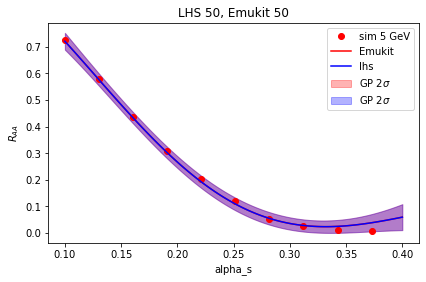

Working on design 1Working on design 3Working on design 2
Working on design 4




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


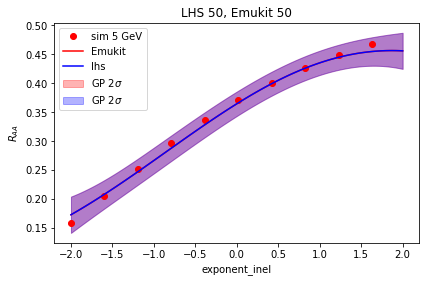

Working on design 4Working on design 2Working on design 1Working on design 3


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


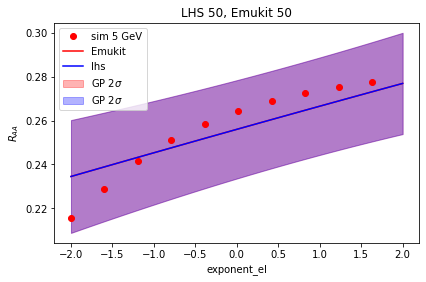

Working on design 4Working on design 2
Working on design 3Working on design 1

Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


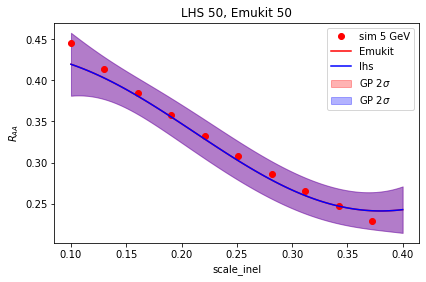

Working on design 1Working on design 4Working on design 3Working on design 5Working on design 2






 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


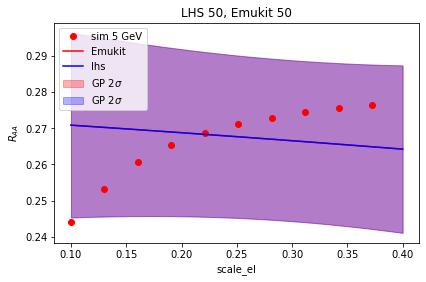

######################
AL before hyperparameters are


Name : GP regression
Objective : -100.45696036281896
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.16727414420057996  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  7.769435977223043e-05  |      +ve      |        
Optimization restart 1/30, f = -100.45696036303713
Optimization restart 2/30, f = -100.4569603609457
Optimization restart 3/30, f = -100.4569603530266
Optimization restart 4/30, f = -100.45696034556758
Optimization restart 5/30, f = -100.45696035220274
Optimization restart 6/30, f = -100.45696033999906
Optimization restart 7/30, f = -85.12622097162891
Optimization restart 8/30, f = -100.45696034230909
Optimization restart 9/30, f = -100.4569603338341
Optimization restart 10/30, f =

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

For model parameters [ 0.37566067 -0.90696532 -0.02634286  0.39360701  0.37011952] takes 66.81264996528625 S
Total run time for the simulations 1.11 minutes
Optimization restart 1/30, f = -107.33282096952706
Optimization restart 2/30, f = -107.3329490346201
Optimization restart 3/30, f = -107.33294907203788
Optimization restart 4/30, f = -107.33294906154367
Optimization restart 5/30, f = -107.33294907126674
Optimization restart 6/30, f = -107.33294903705783
Optimization restart 7/30, f = -107.33294907200856
Optimization restart 8/30, f = -107.33294817568026
Optimization restart 9/30, f = -107.33294902811201
Optimization restart 10/30, f = -107.33294902129948
Optimization restart 11/30, f = -107.3329490702438
Optimization restart 12/30, f = -107.33294906778563
Optimization restart 13/30, f = -107.3329490720292
Optimization restart 14/30, f = -107.33294906951816
Optimization restart 15/30, f = -107.33294905599071
Optimization restart 16/30, f = -107.33294906282734
Optimization restart 17

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 60.07211184501648 S
Total run time for the simulations 1.40 minutes


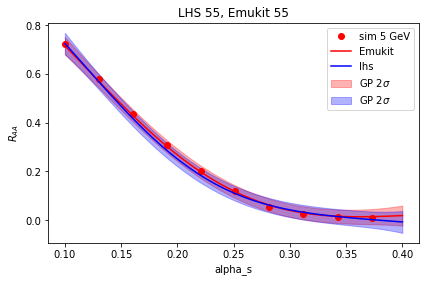

Working on design 2Working on design 3Working on design 1Working on design 4


Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


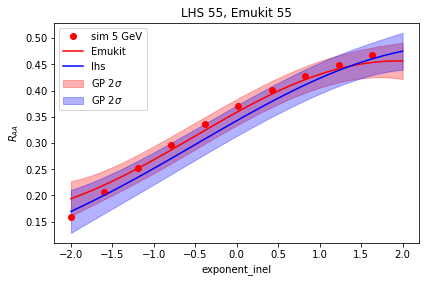

Working on design 3Working on design 5
Working on design 1Working on design 2Working on design 4





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


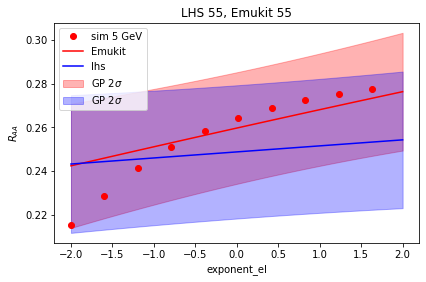

Working on design 3Working on design 1Working on design 4
Working on design 2

Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


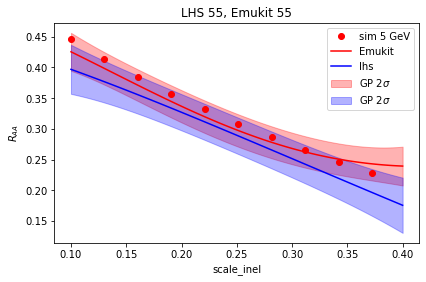

Working on design 1Working on design 3Working on design 2Working on design 4



Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


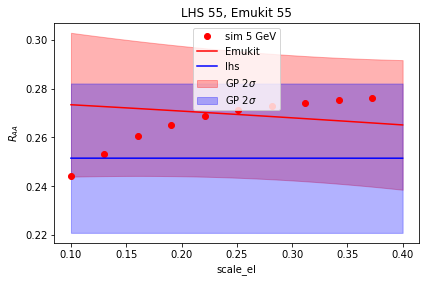

#################### 
 ######################
Validation score for 0 iteration AL 0.0237859126253004 , LHS 0.021843708379981126
######################
AL before hyperparameters are


Name : GP regression
Objective : -107.33294907203788
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1856493684349631  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00012243768663885976  |      +ve      |        
Optimization restart 1/30, f = -107.33294907204908
Optimization restart 2/30, f = -107.33294894669419
Optimization restart 3/30, f = -107.33294906795206
Optimization restart 4/30, f = -107.33294907090605
Optimization restart 5/30, f = -107.33294904738386
Optimization restart 6/30, f = -107.33294901633293
Optimization restart 7/30, f = -107.332949023975

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.38142905 -1.82836165  1.571421    0.3141953   0.24915719] takes 95.16973948478699 S
Total run time for the simulations 1.59 minutes
Optimization restart 1/30, f = -114.68765797941529
Optimization restart 2/30, f = -114.68765864873328
Optimization restart 3/30, f = -114.68765860019033
Optimization restart 4/30, f = -114.68765855576217
Optimization restart 5/30, f = -114.68765863261123
Optimization restart 6/30, f = -114.68765864190931
Optimization restart 7/30, f = -114.68765863825422
Optimization restart 8/30, f = -114.68765855514677
Optimization restart 9/30, f = -114.6876585839401
Optimization restart 10/30, f = -114.6876586491404
Optimization restart 11/30, f = -114.68765851661489
Optimization restart 12/30, f = -114.68765860710255
Optimization restart 13/30, f = -114.68765863355631
Optimization restart 14/30, f = -114.68765850681041
Optimization restart 15/30, f = -114.68765864014719
Optimization restart 16/30, f = -114.68765857275099
Optimization restart 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9Working on design 10



 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 60.9804584980011 S
Total run time for the simulations 1.42 minutes


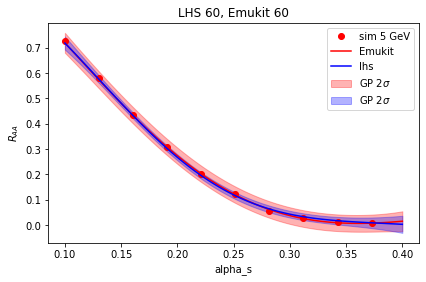

Working on design 1Working on design 3Working on design 2Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


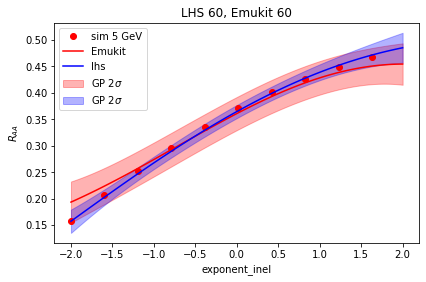

Working on design 3Working on design 4Working on design 2Working on design 5Working on design 1






 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


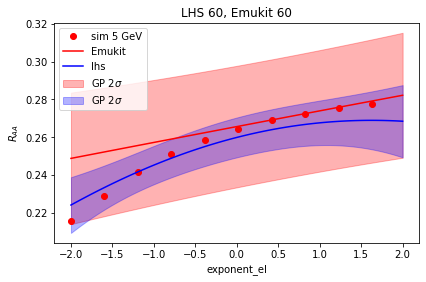

Working on design 1Working on design 2Working on design 5Working on design 4Working on design 3





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


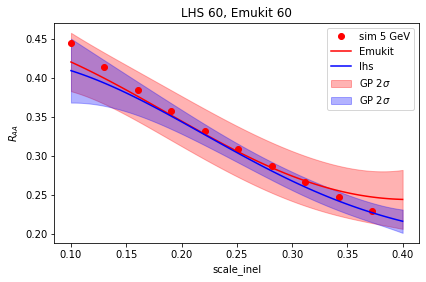

Working on design 3Working on design 4
Working on design 2Working on design 1Working on design 5





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.88 minutes


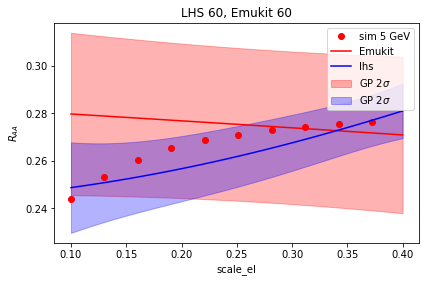

#################### 
 ######################
Validation score for 1 iteration AL 0.019580260467844977 , LHS 0.015118488416965604
######################
AL before hyperparameters are


Name : GP regression
Objective : -114.68765865028614
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.22559000287840703  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00020614915900021757  |      +ve      |        
Optimization restart 1/30, f = -114.68765865031001
Optimization restart 2/30, f = -114.68765860411935
Optimization restart 3/30, f = -114.68765864712039
Optimization restart 4/30, f = -114.68765862065703
Optimization restart 5/30, f = -114.68765862921738
Optimization restart 6/30, f = -114.68765864953501
Optimization restart 7/30, f = -114.6876584166

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 3

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

For model parameters [ 0.39667624  0.50243408 -1.13190609  0.10167722  0.32398474] takes 68.6395914554596 S
Total run time for the simulations 1.14 minutes
Optimization restart 1/30, f = -126.61395214861811
Optimization restart 2/30, f = -126.61399535565839
Optimization restart 3/30, f = -56.30463135840829
Optimization restart 4/30, f = -126.61400353387704


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 5/30, f = -126.61400314013906
Optimization restart 6/30, f = -119.75528838112245
Optimization restart 7/30, f = -126.6139988325478
Optimization restart 8/30, f = -119.75528836400683
Optimization restart 9/30, f = -126.61400395873417
Optimization restart 10/30, f = -126.61400380031412
Optimization restart 11/30, f = -126.61400306343619
Optimization restart 12/30, f = -119.75528833717786
Optimization restart 13/30, f = -119.75528824334629
Optimization restart 14/30, f = -126.61399033469442
Optimization restart 15/30, f = -126.61400372578672
Optimization restart 16/30, f = -126.61400423781315
Optimization restart 17/30, f = -119.75528840045509
Optimization restart 18/30, f = -119.75528830533258
Optimization restart 19/30, f = -119.75528831273309
Optimization restart 20/30, f = -126.61400455520352
Optimization restart 21/30, f = -119.7552883972471
Optimization restart 22/30, f = -126.59669737729115
Optimization restart 23/30, f = -126.61400251185239
Optimization restar

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.88151931762695 S
Total run time for the simulations 1.45 minutes


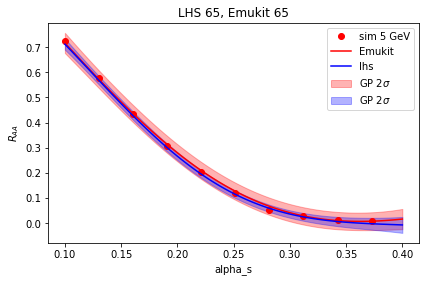

Working on design 1Working on design 4Working on design 2Working on design 3





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


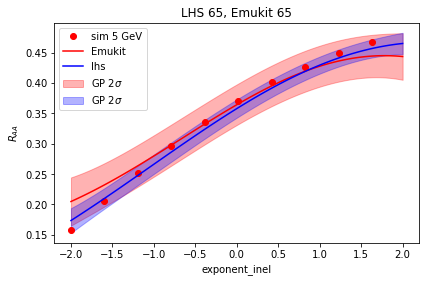

Working on design 3Working on design 1

Working on design 4Working on design 5Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


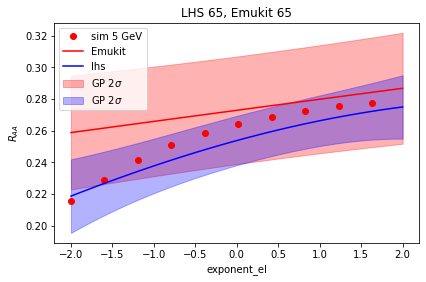

Working on design 3Working on design 4Working on design 5Working on design 1
Working on design 2





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


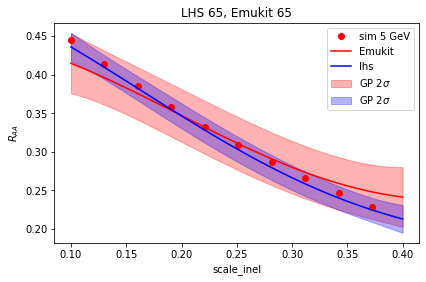

Working on design 1Working on design 3Working on design 2Working on design 4Working on design 5





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.86 minutes


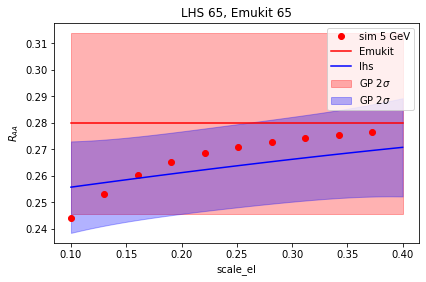

#################### 
 ######################
Validation score for 2 iteration AL 0.02065421633417068 , LHS 0.022362069748854175
######################
AL before hyperparameters are


Name : GP regression
Objective : -126.61400455520352
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.2934266516023383  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00023862720053022458  |      +ve      |        
Optimization restart 1/30, f = -126.61400457838485
Optimization restart 2/30, f = -126.61399172726526


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 3/30, f = -126.61400391359105
Optimization restart 4/30, f = -126.61400447018076
Optimization restart 5/30, f = -119.7552878120111
Optimization restart 6/30, f = -126.61400424410704
Optimization restart 7/30, f = -126.61400327424775
Optimization restart 8/30, f = -119.75528836761531
Optimization restart 9/30, f = -126.61400398045416
Optimization restart 10/30, f = -126.61400187442183
Optimization restart 11/30, f = -80.6486135281101
Optimization restart 12/30, f = -126.6140033130056
Optimization restart 13/30, f = -126.61400417510016
Optimization restart 14/30, f = -126.61400440709946
Optimization restart 15/30, f = -119.75528838950522
Optimization restart 16/30, f = -126.61400398665278
Optimization restart 17/30, f = -126.61400426418311
Optimization restart 18/30, f = -126.59542435905823
Optimization restart 19/30, f = -126.61400103097692
Optimization restart 20/30, f = -126.61400402006063
Optimization restart 21/30, f = -126.61399350051445
Optimization restart 22

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.3901928  -1.75767132 -1.77198207  0.37496829  0.33070047] takes 132.10464096069336 S
Total run time for the simulations 2.20 minutes
Optimization restart 1/30, f = -133.97529507016867
Optimization restart 2/30, f = -130.97830567533595
Optimization restart 3/30, f = -130.97830543529182
Optimization restart 4/30, f = -130.97830561897678
Optimization restart 5/30, f = -130.9783053113296
Optimization restart 6/30, f = -130.97830560698927
Optimization restart 7/30, f = -133.97529532258412
Optimization restart 8/30, f = -130.97830568025557
Optimization restart 9/30, f = -130.97830566381907
Optimization restart 10/30, f = -130.9783056800871
Optimization restart 11/30, f = -130.97830567912717
Optimization restart 12/30, f = -130.97830565059778
Optimization restart 13/30, f = -130.97830567990914
Optimization restart 14/30, f = -130.97830564744086
Optimization restart 15/30, f = -130.9783056335121
Optimization restart 16/30, f = -130.97830529907606
Optimization restart 1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 62.80449318885803 S
Total run time for the simulations 1.45 minutes


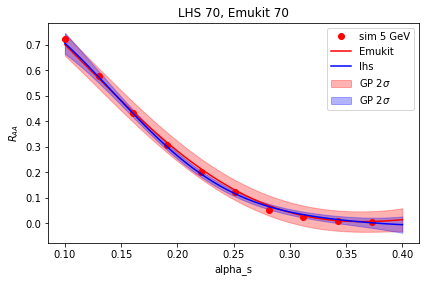

Working on design 1Working on design 3
Working on design 5Working on design 2
Working on design 4



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


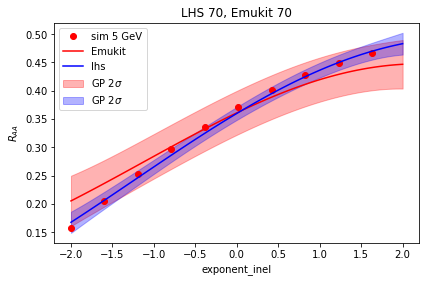

Working on design 2
Working on design 1
Working on design 4Working on design 3


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


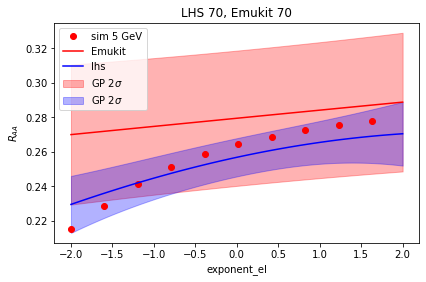

Working on design 3Working on design 1Working on design 4

Working on design 2Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


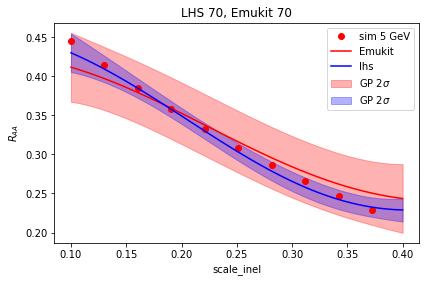

Working on design 4
Working on design 1Working on design 3Working on design 2



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5



 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.89 minutes


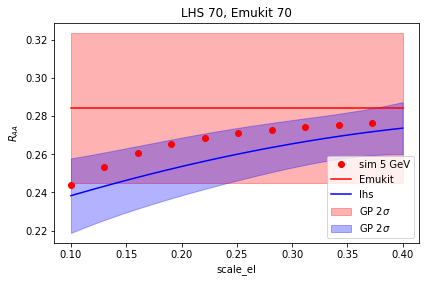

#################### 
 ######################
Validation score for 3 iteration AL 0.019945387364964984 , LHS 0.015422967917175623
######################
AL before hyperparameters are


Name : GP regression
Objective : -133.97529532258412
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.22974342960946614  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00032740532273958133  |      +ve      |        
Optimization restart 1/30, f = -133.9752957092799
Optimization restart 2/30, f = -130.97830565896896


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 3/30, f = -130.97830568014973
Optimization restart 4/30, f = -130.97830553570887
Optimization restart 5/30, f = -130.97830567743924
Optimization restart 6/30, f = -130.97830567239575
Optimization restart 7/30, f = -130.9783056793668
Optimization restart 8/30, f = -130.9783056664655
Optimization restart 9/30, f = -130.978305680309
Optimization restart 10/30, f = -130.978305679916
Optimization restart 11/30, f = -130.97830568003826
Optimization restart 12/30, f = -133.97529563633418
Optimization restart 13/30, f = -130.97830562050922
Optimization restart 14/30, f = -130.97830564223887
Optimization restart 15/30, f = -130.97830567899416
Optimization restart 16/30, f = -130.97830496954666
Optimization restart 17/30, f = -130.97830567905896
Optimization restart 18/30, f = -130.97830567912933
Optimization restart 19/30, f = -130.97830526835713
Optimization restart 20/30, f = -88.67715728152778
Optimization restart 21/30, f = -130.97830563463194
Optimization restart 22/30

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 5


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

For model parameters [ 0.39887501 -1.75115066 -0.31111663  0.23936241  0.22597443] takes 75.5427451133728 S
For model parameters [0.37534474 1.98368659 0.15805014 0.10229278 0.36984263] takes 143.86609387397766 S
Total run time for the simulations 2.40 minutes
Optimization restart 1/30, f = -141.37104786460375
Optimization restart 2/30, f = -141.6110387571506
Optimization restart 3/30, f = -141.61103878533066
Optimization restart 4/30, f = -141.5720416184879
Optimization restart 5/30, f = -141.57204150362168
Optimization restart 6/30, f = -141.57204158101717
Optimization restart 7/30, f = -141.57204148957402
Optimization restart 8/30, f = -141.57204166967597
Optimization restart 9/30, f = -141.55126265585523
Optimization restart 10/30, f = -141.57204159213092
Optimization restart 11/30, f = -141.57204167617726
Optimization restart 12/30, f = -141.57204157977674
Optimization restart 13/30, f = -141.57204167656909
Optimization restart 14/30, f = -141.5720416730046
Optimization restart 15

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 60.56543946266174 S
Total run time for the simulations 1.41 minutes


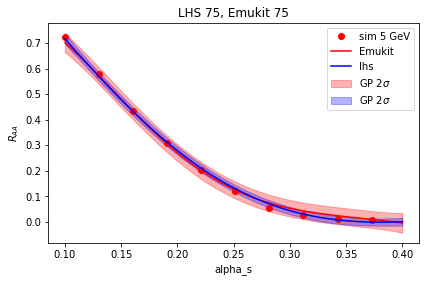

Working on design 2Working on design 3Working on design 1Working on design 4Working on design 5






 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


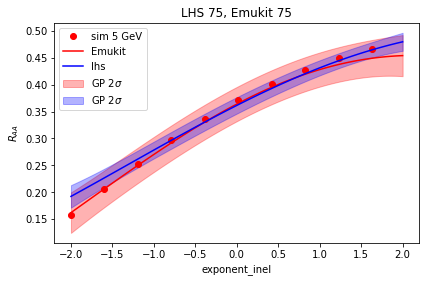

Working on design 2Working on design 4Working on design 1Working on design 3
Working on design 5





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


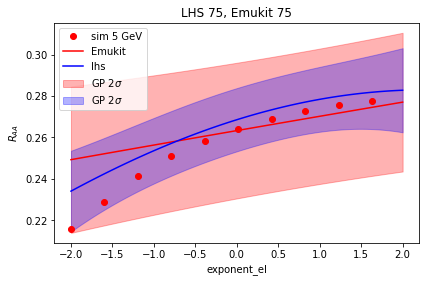

Working on design 3Working on design 1Working on design 5Working on design 2Working on design 4






 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


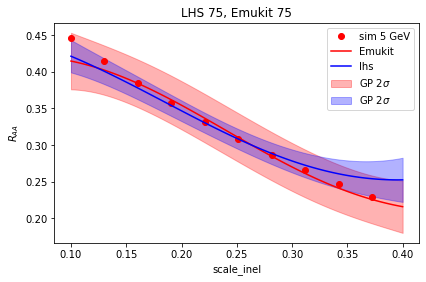

Working on design 1Working on design 3
Working on design 5Working on design 4
Working on design 2


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.87 minutes


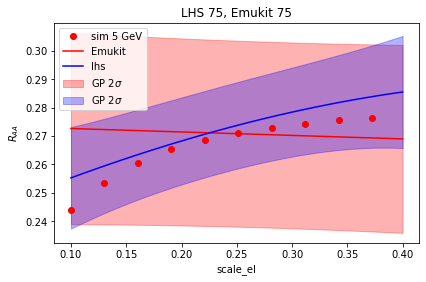

#################### 
 ######################
Validation score for 4 iteration AL 0.016549203615759144 , LHS 0.016189814837085214
######################
AL before hyperparameters are


Name : GP regression
Objective : -141.61103878533066
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.1315619617997895  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00020201001358888037  |      +ve      |        
Optimization restart 1/30, f = -141.61103878757478
Optimization restart 2/30, f = -141.57204167624946
Optimization restart 3/30, f = -141.5720415803988
Optimization restart 4/30, f = -141.572041662809
Optimization restart 5/30, f = -141.57204166828993
Optimization restart 6/30, f = -141.5720416683826
Optimization restart 7/30, f = -141.5720416350976


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small



Working on design 5

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/pa

Total run time for the simulations 0.54 minutes
Optimization restart 1/30, f = -154.1486874280797
Optimization restart 2/30, f = -156.4270463875776
Optimization restart 3/30, f = -156.42704636627298
Optimization restart 4/30, f = -156.427046402317
Optimization restart 5/30, f = -156.4270463969243
Optimization restart 6/30, f = -156.42704636744315
Optimization restart 7/30, f = -156.4270463994697
Optimization restart 8/30, f = -156.42704639540523
Optimization restart 9/30, f = -156.42704638139847
Optimization restart 10/30, f = -156.42704629006
Optimization restart 11/30, f = -156.42704638756607
Optimization restart 12/30, f = -156.42704639891372
Optimization restart 13/30, f = -156.42704639599975
Optimization restart 14/30, f = -156.42704639614948
Optimization restart 15/30, f = -153.85250823817756
Optimization restart 16/30, f = -154.14012333917736
Optimization restart 17/30, f = -156.42704638689736
Optimization restart 18/30, f = -156.42704627948433
Optimization restart 19/30, f = -1

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


Working on design 4

 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/parton_energy_loss_qcd

Working on design 6Working on design 7

Working on design 8
Working on design 9
Working on design 10


 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /users/PAS0254/dananjaya/parton_energy_loss_qcd_bjorken/solver_rk.py:77: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the 

For model parameters [ 0.37272727 -1.          1.          0.3         0.3       ] takes 61.840638875961304 S
Total run time for the simulations 1.44 minutes


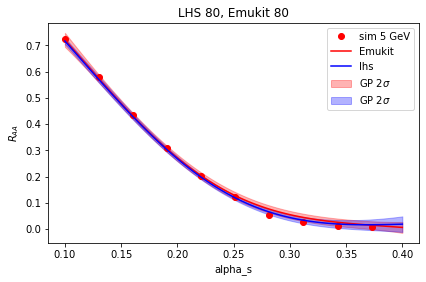

Working on design 4Working on design 1Working on design 3Working on design 2
Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.81 minutes


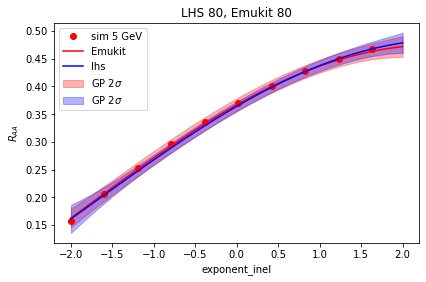

Working on design 4Working on design 2Working on design 3Working on design 1

Working on design 5




 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda

Working on design 6
Working on design 7
Working on design 8
Working on design 9
Working on design 10
Total run time for the simulations 0.82 minutes


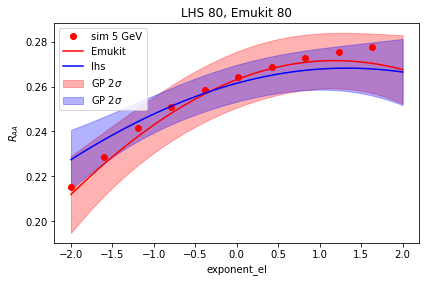

Working on design 3Working on design 2Working on design 1Working on design 4Working on design 5





 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small


 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: step size becomes too small
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/envs/parton_loss_owens/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning:dopri5: larger nsteps is needed
 /users/PAS0254/dananjaya/.conda/env

In [ ]:
import time
time_iter = []
bs = 5

# The active learning GP
GP_al = gp_array[0]
    
 # LHS GP
GP_lhs = gp_array[1]
validation_array = [compare_gp(GP_al, GP_lhs)]
for i in range(0,30):
    st = time.time()
    #val = compare_gp(GP_al, GP_lhs)
    #integrated_var = ModelVariance(model = GP_al)
    integrated_var = IntegratedVarianceReduction(model = GP_al, space=parameter_space)
    expdesign_loop = ExperimentalDesignLoop(model = GP_al,
                                         space = parameter_space,
                                         acquisition = integrated_var,
                                         batch_size = bs)
    print('######################')
    print('AL before hyperparameters are\n')
    print(GP_al.model)
    ed=expdesign_loop.run_loop(f,1)
    print('######################')
    print('AL After hyperparameters are \n')
    print(GP_al.model)    

    x_new = np.array(lhs_df[lhs_df['step'] == 50+bs*(i+1)])[:,1:6]
    y_new = np.array(lhs_df[lhs_df['step'] == 50+bs*(i+1)])[:,6:]
    GP_lhs.set_data(x_new, y_new[:,  pT_obs])
    print('######################')
    print('LHS before hyperparameters are\n')
    print(GP_lhs.model)
    GP_lhs.optimize()
    print('######################')
    print('LHS After hyperparameters are\n')
    print(GP_lhs.model)
    
    print(f'time taken for the iteraton {i} is {time.time()-st} S')
    time_iter.append(time.time()-st)
    val = compare_gp(GP_al, GP_lhs)
    validation_array.append(val)
    print('#################### \n ######################')
    print(f'Validation score for {i} iteration AL {val[0]} , LHS {val[1]}')

In [20]:
validation_array

[[0.027669389949879452, 0.02766944075871056],
 [0.0237859126253004, 0.021843708379981126],
 [0.019580260467844977, 0.015118488416965604],
 [0.02065421633417068, 0.022362069748854175],
 [0.019945387364964984, 0.015422967917175623],
 [0.016549203615759144, 0.016189814837085214],
 [0.01043558027143939, 0.01602478004755778],
 [0.009339355736524696, 0.014974976101299168],
 [0.00820641880249301, 0.01177938798801127],
 [0.008173959254845023, 0.01303597604434715],
 [0.008899454260668536, 0.01414609033799993],
 [0.009426098379452002, 0.015662340637741728],
 [0.007664329864678977, 0.009859295458986683],
 [0.008205045627691341, 0.011141768319209384],
 [0.007629540900353661, 0.01859746171647243],
 [0.007761248193662228, 0.016540666769953354],
 [0.007818560651279715, 0.012615707342167643],
 [0.006919712401834908, 0.009620988673351432],
 [0.00653502745727947, 0.014403124136313795],
 [0.006428570865642334, 0.011135761312571973],
 [0.00637807129846539, 0.010043748162895267],
 [0.006331561335926729, 0.

In [29]:
5*len(validation_array)

125

In [21]:
import pickle

In [22]:
with open('AL_int_var_50_gp_200' , "wb") as f:
     pickle.dump(gp_array[0], f)  
        
with open('LHS_int_var_50_gp_200' , "wb") as f:
     pickle.dump(gp_array[1], f)          

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

In [ ]:
#validation_array = [[0.3497645851980539, 0.34976458473533767], [0.3555257417074416, 0.34673195130123846],
#                    [0.35296760623205115, 0.3497534016570972], [0.351482593548918, 0.35025848892902484],
#                    [0.35194158242772355, 0.34887572415246815], [0.3542566977764108, 0.3509867957806837],
#                    [0.3570148193271013, 0.3500230663671523]]

Text(0.5, 0, 'Number of training points')

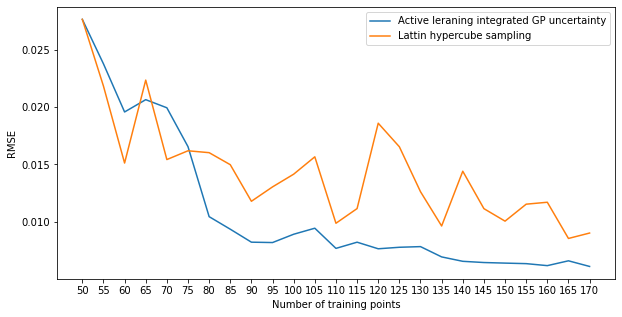

In [48]:
validation_array = np.array(validation_array)
fig, ax = plt.subplots(figsize=(10,5))
n_train = np.arange(start_n,175,5)
ax.plot(n_train, validation_array[:,0], label = 'Active leraning integrated GP uncertainty')
ax.plot(n_train, validation_array[:,1], label = 'Lattin hypercube sampling')
ax.set_xticks(n_train)
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Number of training points')

In [31]:
time_iter

[1302.9936547279358,
 1446.5188519954681,
 1507.390031337738,
 1704.5156717300415,
 1826.894591808319,
 1813.8059225082397,
 1970.9443860054016,
 2015.1672718524933,
 2134.9724192619324,
 2242.180971622467,
 2360.1482355594635,
 2495.184587955475,
 2572.886169910431,
 2696.0617384910583,
 2705.9916734695435,
 2834.627166748047,
 2999.2908391952515,
 3075.713296175003,
 3159.318119287491,
 3307.7202055454254,
 3394.612236022949,
 3587.8687760829926,
 3616.248563528061,
 3745.0894796848297]

Text(0.5, 0, 'Number of training points')

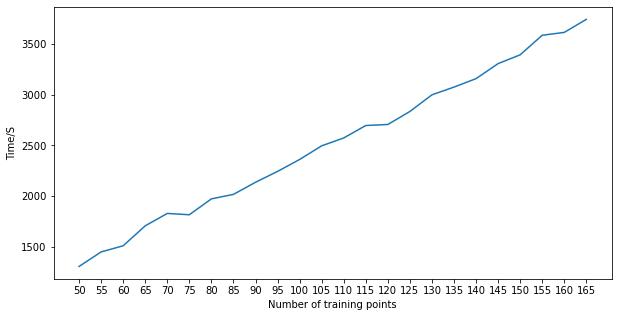

In [50]:
time_ar = np.array(time_iter)
fig, ax = plt.subplots(figsize=(10,5))
n_train = np.arange(start_n,170,5)
ax.plot(n_train, time_ar, label = 'Active leraning time')
ax.set_xticks(n_train)
ax.set_ylabel('Time/S')
ax.set_xlabel('Number of training points')

In [38]:
AL_design = GP_al.X[start_n:170,:]
print(AL_design.shape)

(120, 5)


In [39]:
c_l = np.array([i*np.ones(bs) for i in np.arange(0,AL_design.shape[0],bs)]).reshape(-1,1)

In [40]:
c_l.shape

(120, 1)

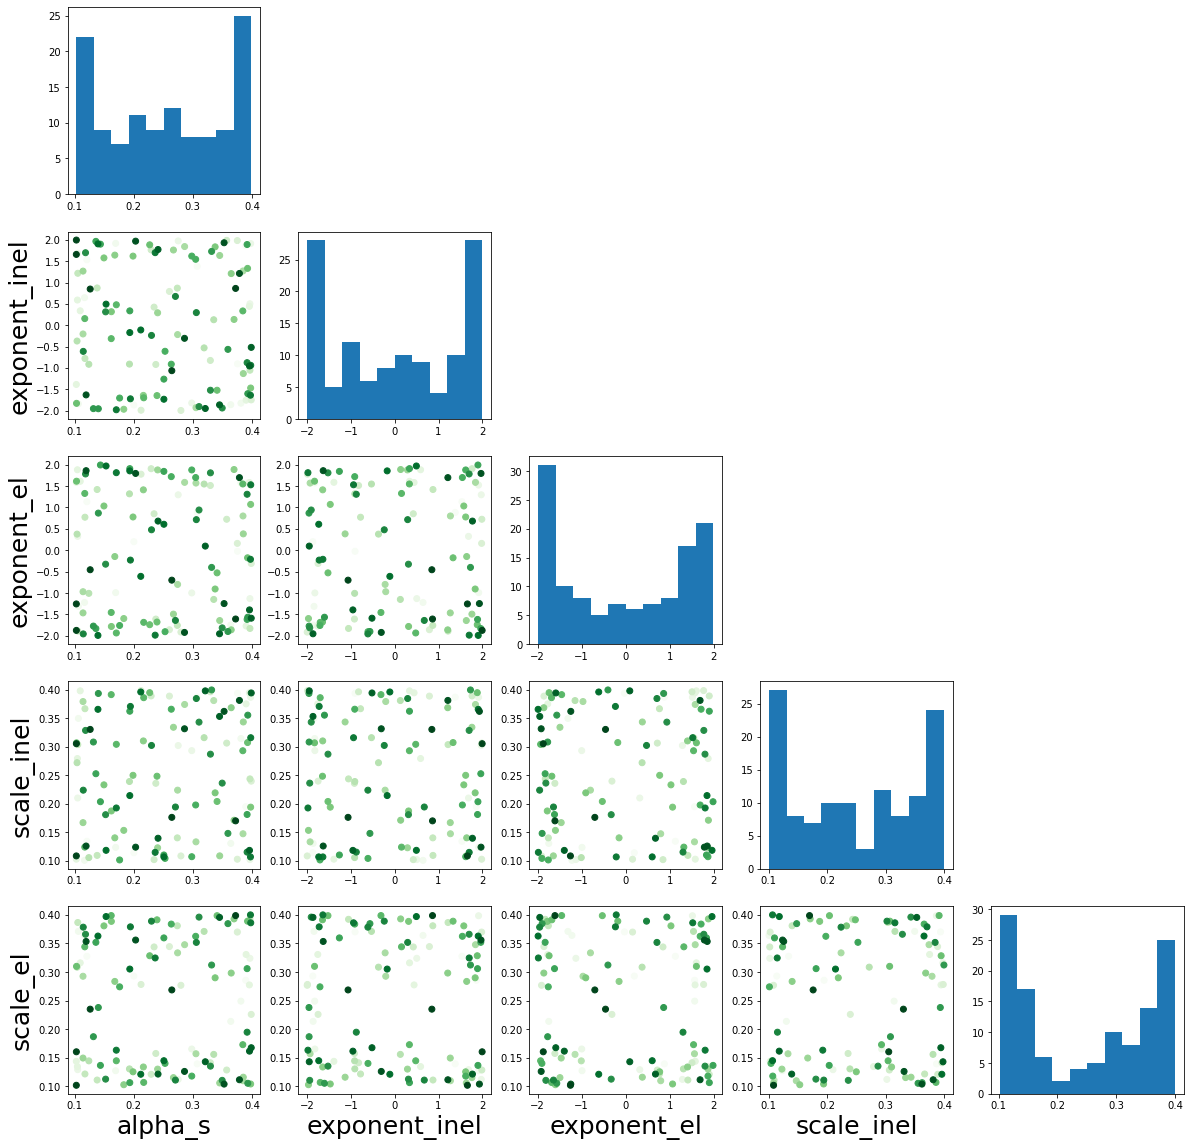

In [41]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(AL_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(AL_design[:,clmn],AL_design[:,row], c = c_l, cmap='Greens')

In [42]:
lhs_design = GP_lhs.X[start_n:,:]
print(lhs_design.shape)

(120, 5)


### How the lattin hyper cube sampling look like

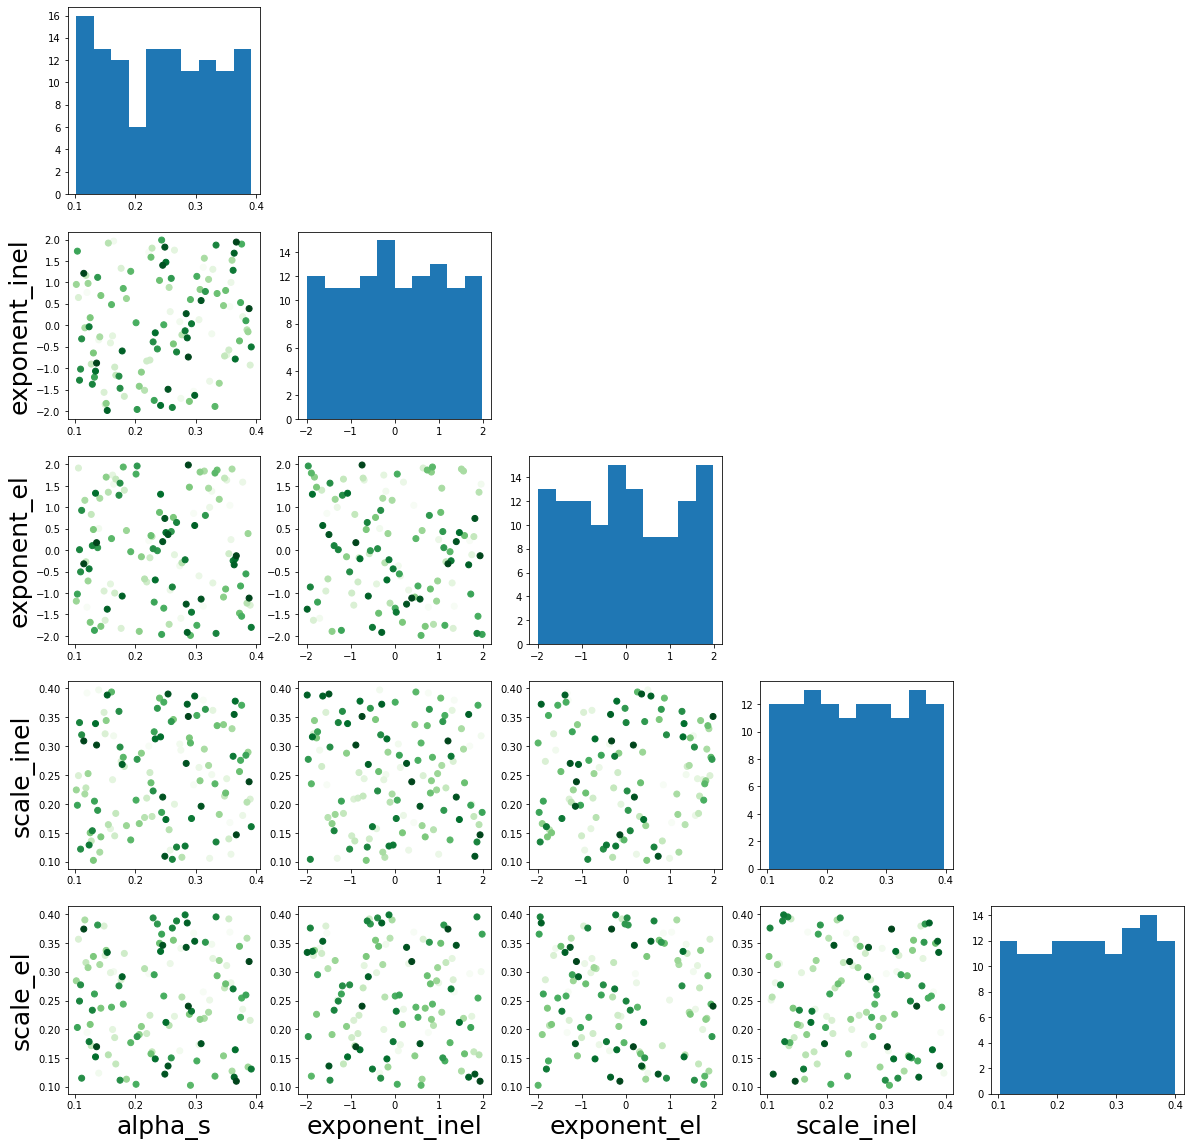

In [43]:


## Lattin Hyper cube samples
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, axs= plt.subplots(5,5, figsize=(20,20))
for row in range(0,5):
    for clmn in range(0,5):
        if row < clmn:
            ax = axs[row,clmn]
            ax.axis('off')
            continue
        if row == clmn:
            ax = axs[row,clmn]
            ax.hist(lhs_design[:,clmn])
        else:
            ax= axs[row,clmn]
            if row == 4:
                ax.set_xlabel(list(prior_ranges.keys())[clmn], fontsize =25)
            if clmn == 0:
                ax.set_ylabel(list(prior_ranges.keys())[row], fontsize =25)
            ax.scatter(lhs_design[:,clmn],lhs_design[:,row], c = c_l, cmap='Greens')